<h1><center>Customer Churn Prediction</center></h1>
<h3><center>Data Analysis and Preprocessing</center></h3>



Customer Churn Prediction is a binary classification problem to predict whether a customer will change telecommunications provider or not. 

In this notebook, I made data analysis, visualization, preprocessing, and statistical testing trying to understand deeply how the features correlate to each other and the target column.

In other words, this notebook is for analysis and take decisions on how would I prepare the data for the training


<div id="toc_container">
<p class="toc_title">Table Of Contents</p>
<ul class="toc_list">
  <li><a href="#EDA">1. Explorator Data Analysis</a></li>
  <li><a href="#numerical_analysis">2. Numerical Data Analysis and Preprocessing</a></li>
  <ul>
    <li><a href="#outliers">2.1 Handling the Outliers</a></li>
    <li><a href="#feature_engineering">2.2 Feature Engineering</a></li>
    <li><a href="#feature_scaling">2.3 Features Scaling</a></li>
    <li><a href="#feature_corr">2.4 Features Correlation Analysis</a></li>
  </ul>
    
<li><a href="#cat_analysis">3. Categorical Analysis and Preprocessing</a></li> 
  <ul>
    <li><a href="#cat_feature_engineering">3.1 Feature Engineering</a></li>
    <li><a href="#feature_indpendence">3.2 Features Inpendence (Chi2 test)</a></li>
    <li><a href="#cat_encoding">3.3 Categories Encoding</a></li>
      
  </ul>
    
<li><a href="#oversampling">4. Oversampling </a></li> 
    
</ul>
</div>

## Explorator Data Analysis <a class="anchor" id="EDA"></a>

In [1]:
# importing the needed Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency # used to check indpendency between categorical column 
from sklearn.preprocessing import StandardScaler , RobustScaler # used to transform numerical column into approx stand normal distributin u = 0 and std =1 
import category_encoders as CategortEncoder# Binary encoder used to encode categorical columns 
from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling Technique based on KNN
from sklearn.metrics import accuracy_score,classification_report # required Accuracy metirics  mainly(Accuracy score,  F1 -secore)
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [4]:
df.describe(include ="all")

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Dividing the labeled dataset ('train.csv') into two data sets, train and test set 

Here I decided to split the test set before the preprocessing step to aviod **data Leak** in order to perform fair testing 

In [6]:
train_df, test_df = train_test_split(df, test_size=0.25 , random_state=46)

In [7]:
test_df.to_csv('datasets/test_set.csv' , index=False)
train_df.to_csv('datasets/train_set.csv' , index=False)

Check Duplicate Rows

In [8]:
train_df.duplicated().sum()

0

In [9]:
numrical_columns= train_df.columns[ train_df.dtypes != np.object].values
cat_columns = train_df.columns[ train_df.dtypes == np.object].values

# Check Missing Values 

Check if Nan values exist

In [10]:
train_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [11]:
train_df.shape 

(3187, 20)

check if empty string exist in categorical column

In [12]:
def check_empty_in_categorical(cols , df ):
    for col in  cols:
        print (df[col].value_counts())

In [13]:
check_empty_in_categorical(cat_columns , train_df )

WV    102
MN     85
VA     78
ID     77
OR     76
CO     76
VT     74
WY     74
MI     72
NY     72
WI     72
TX     72
AL     71
ME     71
WA     69
OH     69
MA     69
NJ     68
UT     68
MD     68
KS     67
DE     63
RI     63
KY     61
NC     61
CT     61
MO     61
IN     60
NV     59
NE     59
SD     59
TN     59
MT     58
FL     58
NM     57
DC     57
IL     56
SC     55
MS     55
NH     55
AZ     53
AR     51
GA     50
IA     49
LA     49
HI     48
OK     48
AK     48
ND     48
PA     43
CA     33
Name: state, dtype: int64
area_code_415    1574
area_code_408     822
area_code_510     791
Name: area_code, dtype: int64
no     2887
yes     300
Name: international_plan, dtype: int64
no     2370
yes     817
Name: voice_mail_plan, dtype: int64
no     2726
yes     461
Name: churn, dtype: int64


In [14]:
numerical_data = train_df[numrical_columns]
categorical_data  =train_df[cat_columns]

Split the train set into two parts , categorical and numerical.


Each have different analysis and preprocessing

## Numerical Data Analysis and Preprocessing <a class="anchor" id="numerical_analysis"></a>

In [15]:
numerical_data_preprocessesd =numerical_data.copy() 

In [16]:
numerical_data_preprocessesd = pd.concat([numerical_data_preprocessesd, train_df['churn']], axis=1) # Add target column to make meaningful analysis 
numerical_data_preprocessesd['churn_encoded'] = numerical_data_preprocessesd['churn'].map({'yes' :1 , 'no' : 0})

In [17]:
def featurize_numerical_col(df):
    return  pd.melt(df ,value_vars =  numerical_data , id_vars = 'churn' ,var_name = "features" , value_name = "values")

In [35]:
def multiple_analysis(on , Feature_analysis , violin = True  , box = True , strip = True , additional_info = ''):
    query = Feature_analysis [(Feature_analysis['features'] =='total_day_'+on ) |  (Feature_analysis['features'] =='total_night_'+on ) 
                              |(Feature_analysis['features'] =='total_eve_'+on ) | (Feature_analysis['features'] =='total_intl_'+on)]
    fig = plt.figure(figsize=(25,12))
    gs0 = matplotlib.gridspec.GridSpec(1,3, figure=fig)

    count =0 
    if violin :
        ax1 = fig.add_subplot(gs0[0,count])
        sns.violinplot(ax = ax1 , data = query , x = 'features' , y = 'values' , hue = 'churn' ,split = True , inner = 'quart')
        ax1.set(title='Violin plot for ' + on + ' over different day timings' +additional_info)
        count+=1

    if box :
        ax2 = fig.add_subplot(gs0[0,count])
        sns.boxplot(ax =ax2 , data = query , x = 'features' , y = 'values' , hue = 'churn' )
        ax2.set(title='Box plot for ' + on + ' over different day timings' + additional_info)
        count +=1

    if strip:
        ax3 = fig.add_subplot(gs0[0,count])
        sns.stripplot(ax =ax3,data = query ,  x = 'features' , y = 'values' , hue = 'churn' )
        ax3.set(title='Swarm plot for ' + on + ' over different day timings' +additional_info)
   

In [36]:
df_melt = featurize_numerical_col(numerical_data_preprocessesd)

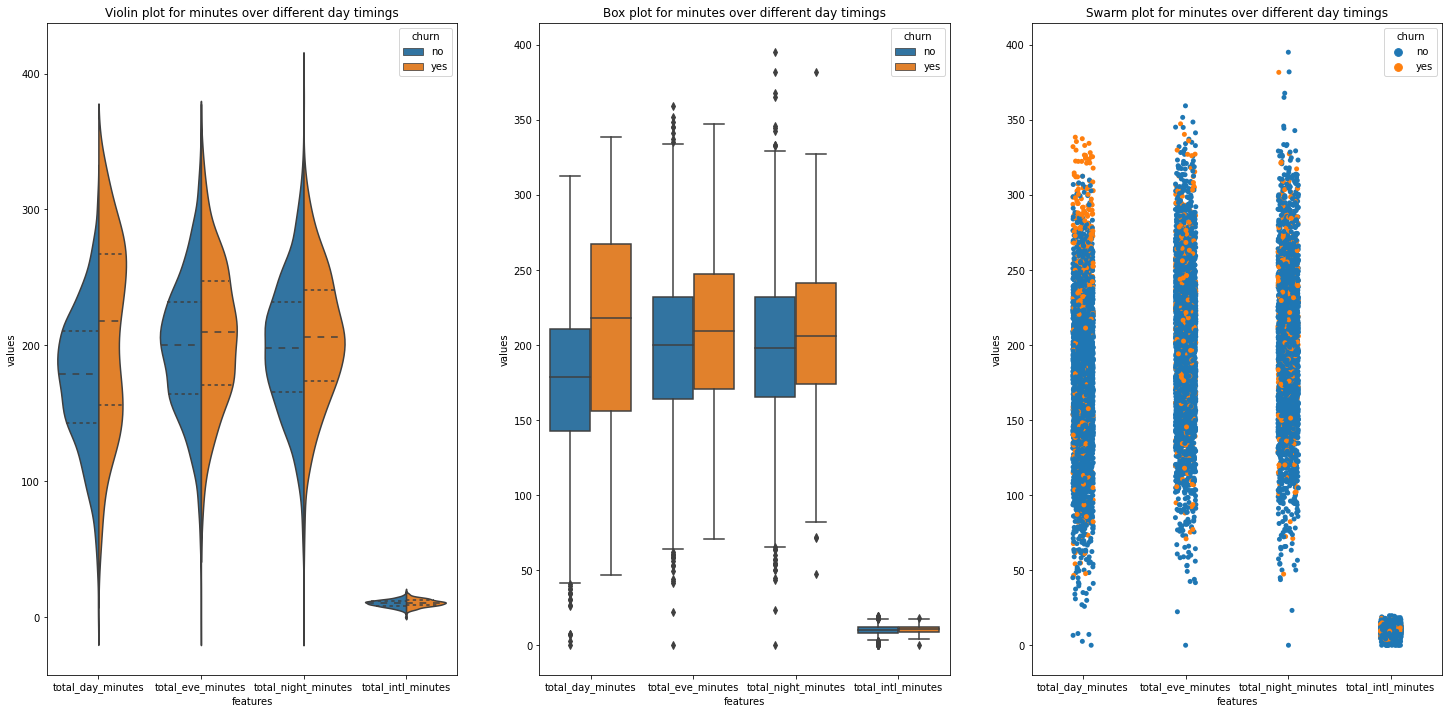

In [37]:
multiple_analysis('minutes' , df_melt)

It's obvious to analyze that YES group has higher values than NO group in the first three columns

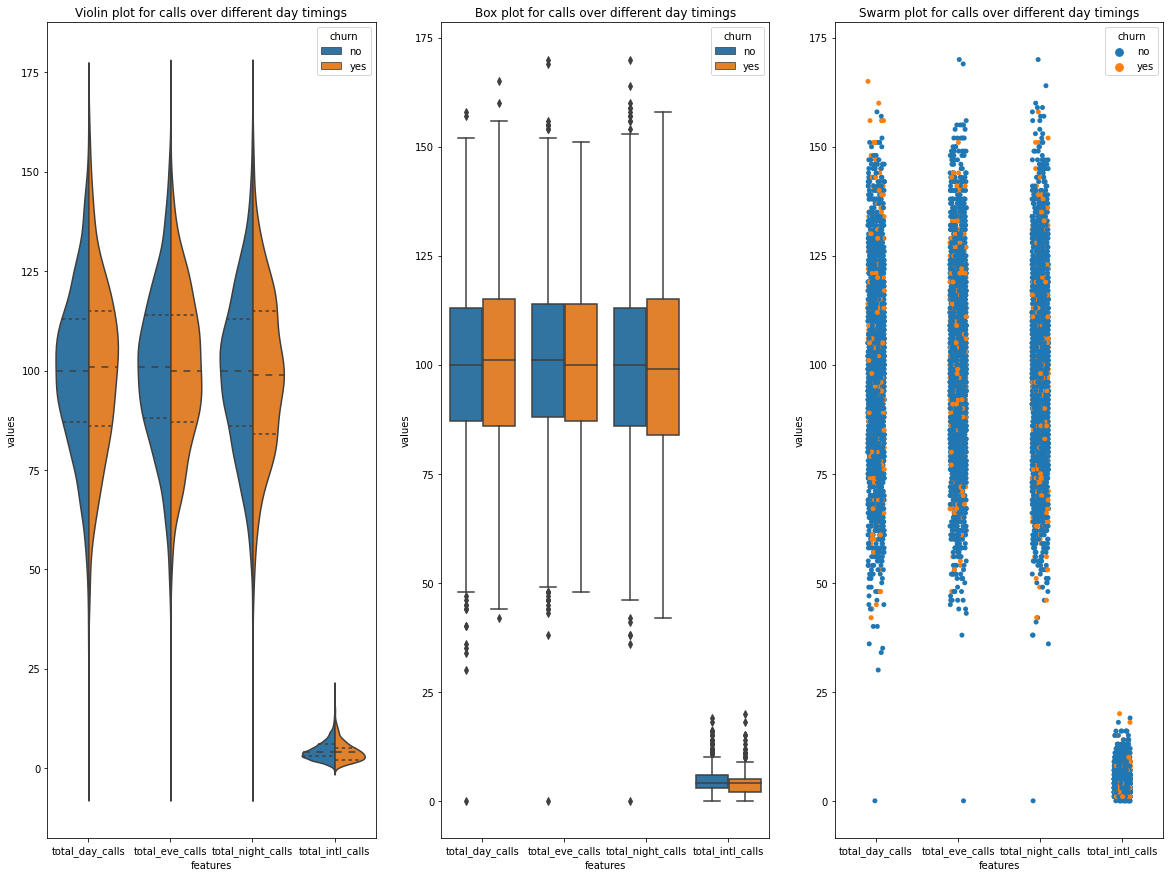

In [21]:
multiple_analysis('calls' , df_melt)

The two groups have simialar distributions in this case

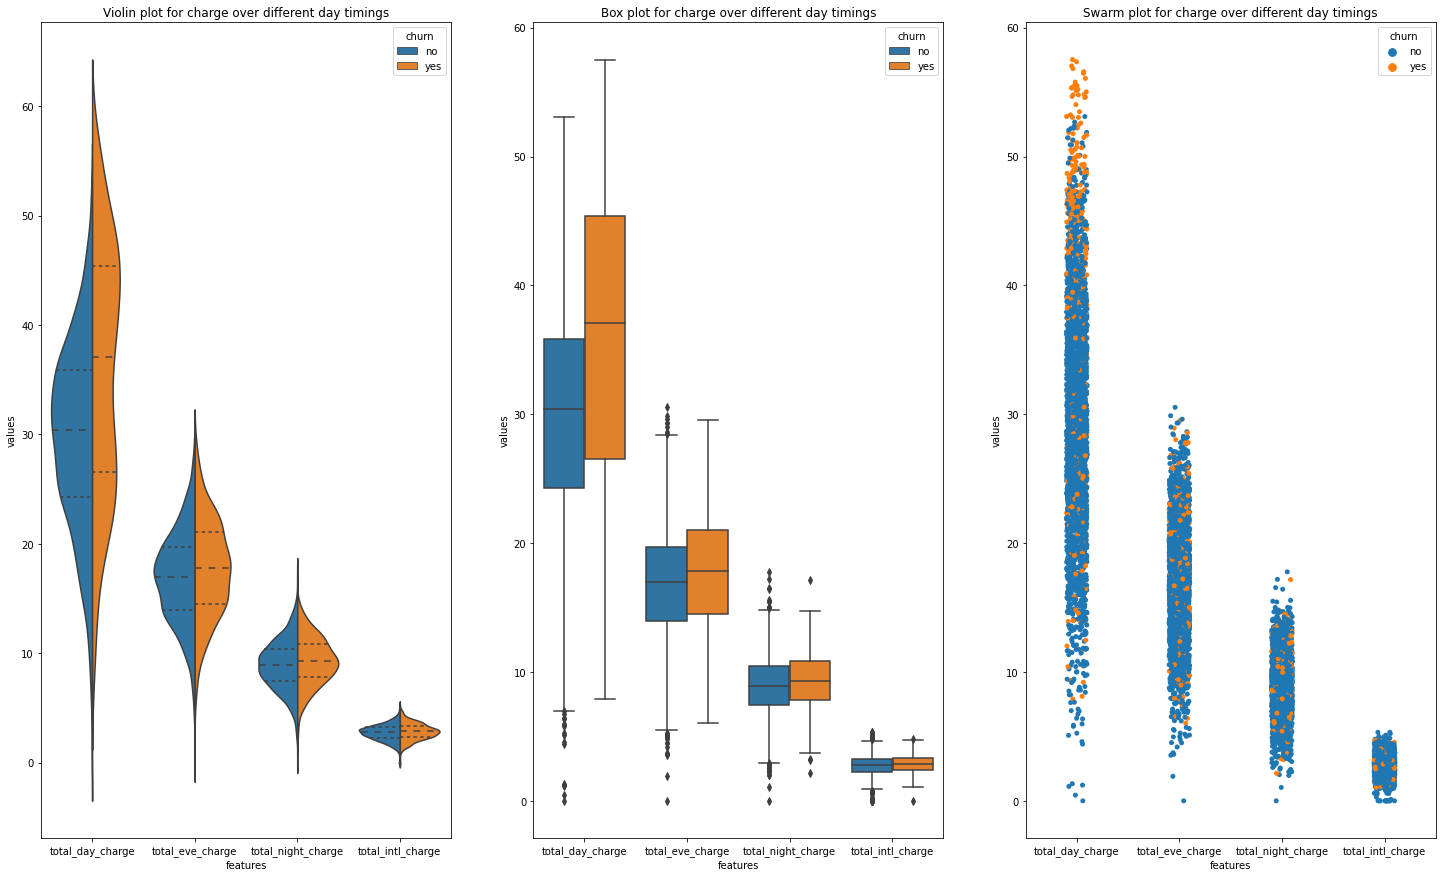

In [22]:
multiple_analysis('charge' , df_melt)

Similar to the first observation Which makes sense , As the minutes has positive relation with the charge of the call 

Here we analyze that No group have more service calls in range 0 to 4

In [71]:
def distibution_analysis(df , col , countplot = True , hue_analysis = True):

    if hue_analysis:
        fig = plt.figure(figsize=(20,10))
        gs0 = matplotlib.gridspec.GridSpec(1,2, figure=fig)
        ax1 = fig.add_subplot(gs0[0,0])
        if countplot:
            sns.countplot( ax =ax1, data = df , x = col  , hue = 'churn' )
            ax1.set(title='Count plot of '+ col)
        else :
            sns.kdeplot(  ax =ax1, data = df , x = col  , hue = 'churn'  ,clip=(0,300) )
            ax1.set(title='KDE plot of '+ col)



        ax2 = fig.add_subplot(gs0[0,1])
        sns.boxplot( ax =ax2, data = df , y = col  , x = 'churn' )
        ax2.set(title='boxplot of '+ col)
        
    else :
        plt.figure(figsize=(10,10))
        sns.kdeplot( data = df , x = col )
        plt.title('KDE plot of '+ col)
        


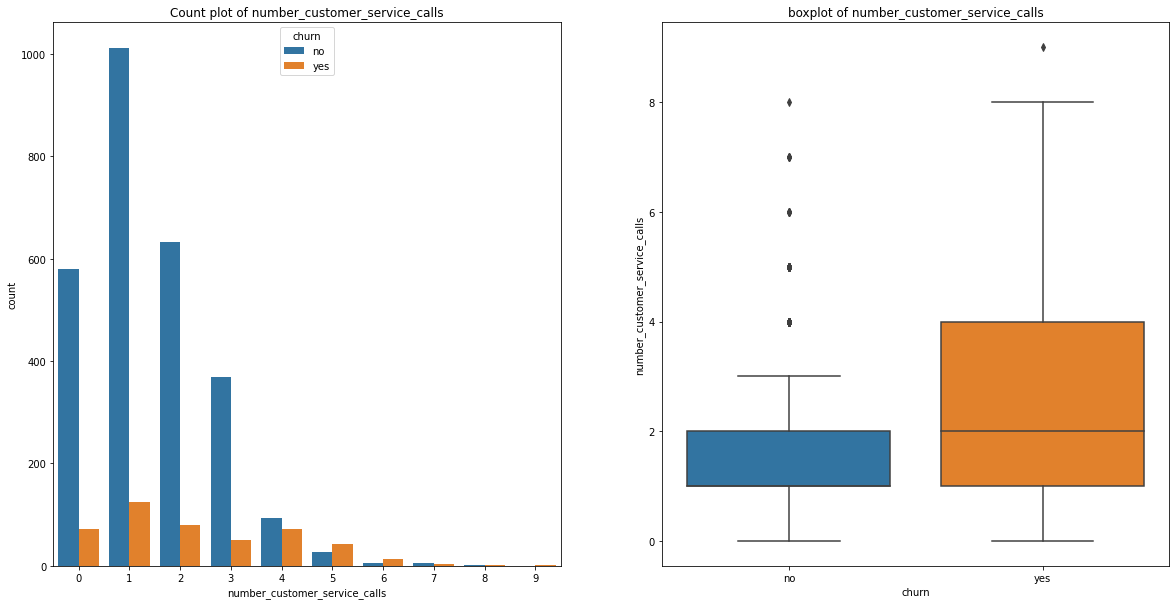

In [72]:
distibution_analysis(numerical_data_preprocessesd , 'number_customer_service_calls')

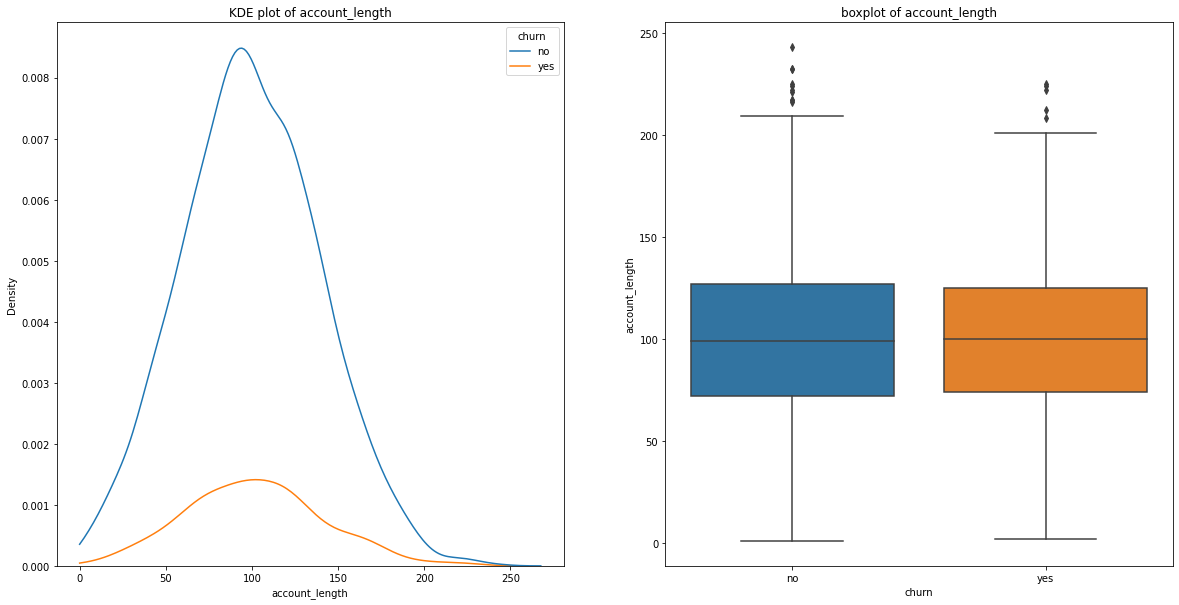

In [73]:
distibution_analysis(numerical_data_preprocessesd , 'account_length' ,countplot = False)

## Handling the Outliers <a class="anchor" id="outliers"></a>

Here I will handle the outliers using IQR (InterQuartile Range) Techinque

Not all the outliers will be removed due to 2 reasons:-

1- The data set is not big (to avoid losing data)

2- I will target the columns that make a difference between the two groups

In [74]:
def IQR_technique(column,df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    return lower ,upper

In [75]:
def get_outliers(df , col, verbose = True):
    lower ,upper = IQR_technique(col,df)
    qurey= df[(df[col]< lower) |(df[col]> upper) ] 
    
    if(verbose):
        print ('When chrun = ' , df['churn'].values[0],' the  number of outilers in ', col , ': ' , qurey[col].count())
    return qurey.index.values

In [76]:
def get_outliers_indicies(df , col , verbose = True):
        indicies_to_remove = []
        if col == 'minutes' or col =='charge' or col == 'calls' :
            indicies_to_remove=get_outliers(df , 'total_night_'+col , verbose)
            day_outliers=get_outliers(df , 'total_day_'+col , verbose)
            indicies_to_remove = np.union1d(day_outliers , indicies_to_remove)
            eve_outliers=get_outliers(df , 'total_eve_'+col ,verbose)
            indicies_to_remove = np.union1d(eve_outliers , indicies_to_remove)
            
        else:
            indicies_to_remove=get_outliers(df ,col ,verbose)
        if(verbose):  
            print("percentage of outliers: " + str(len(indicies_to_remove) *100 / len(df)   ))
            print('\n')

        return indicies_to_remove
        

In [77]:
def remove_outliers(df, cols, group , delete= True , verbose = True):
    result = df.copy()
    result_groupped= result[result['churn'] == group]
    indicies_removed = [] 
    for col in cols: 
        idxs = get_outliers_indicies(result_groupped , col , verbose)
        result_groupped =result_groupped.drop(idxs , axis =0 )
        indicies_removed = np.union1d(indicies_removed , idxs)
        
    if delete :
        result= result.drop(indicies_removed , axis =0 )
        return result , indicies_removed
    else : 
        indicies_removed

In [78]:
cols = ['minutes' , 'charge' ]
numerical_OutlierRemoved ,indicies_removed  = remove_outliers(numerical_data_preprocessesd , cols , 'no' )

When chrun =  no  the  number of outilers in  total_night_minutes :  25
When chrun =  no  the  number of outilers in  total_day_minutes :  16
When chrun =  no  the  number of outilers in  total_eve_minutes :  23
percentage of outliers: 2.3110785033015406


When chrun =  no  the  number of outilers in  total_night_charge :  2
When chrun =  no  the  number of outilers in  total_day_charge :  1
When chrun =  no  the  number of outilers in  total_eve_charge :  1
percentage of outliers: 0.1502065339842283




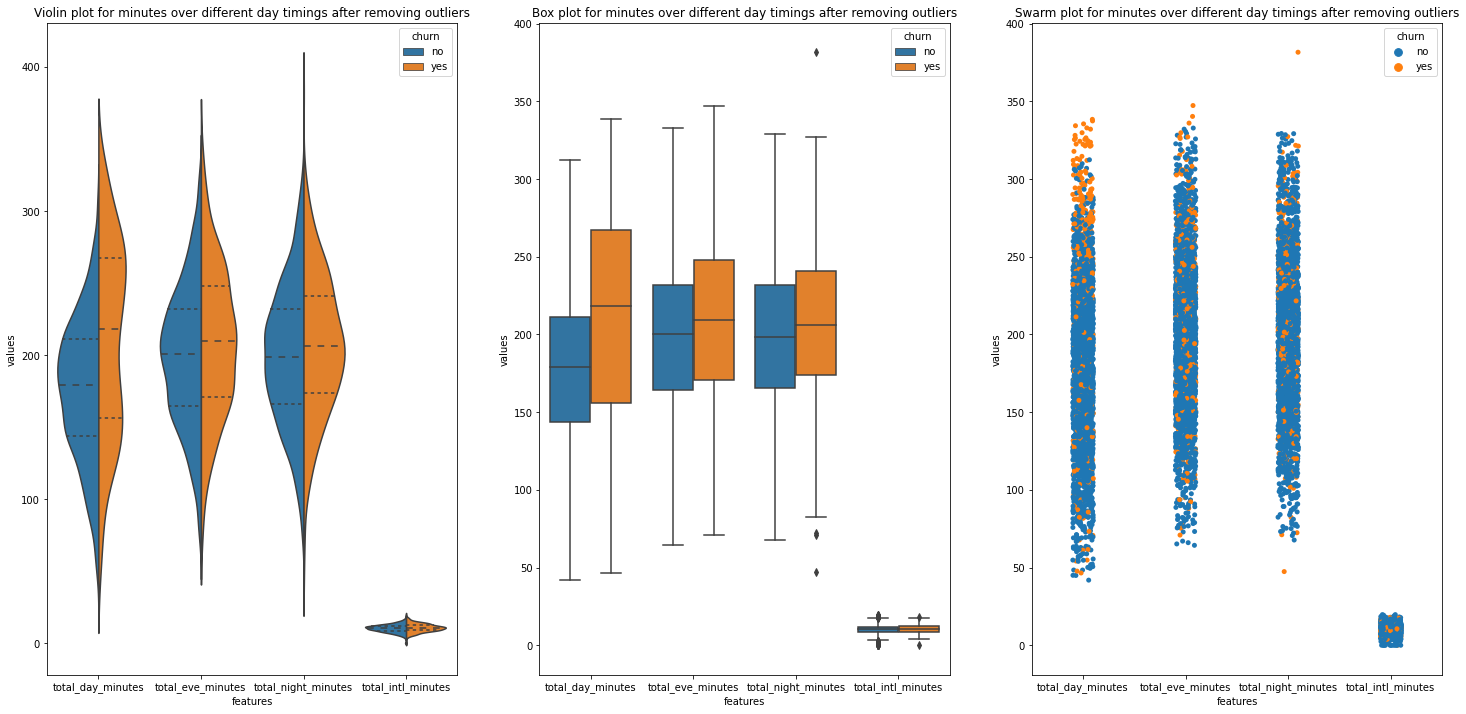

In [79]:
df_melt_without_outliers = featurize_numerical_col(numerical_OutlierRemoved)
multiple_analysis('minutes' , df_melt_without_outliers , additional_info = ' after removing outliers' )

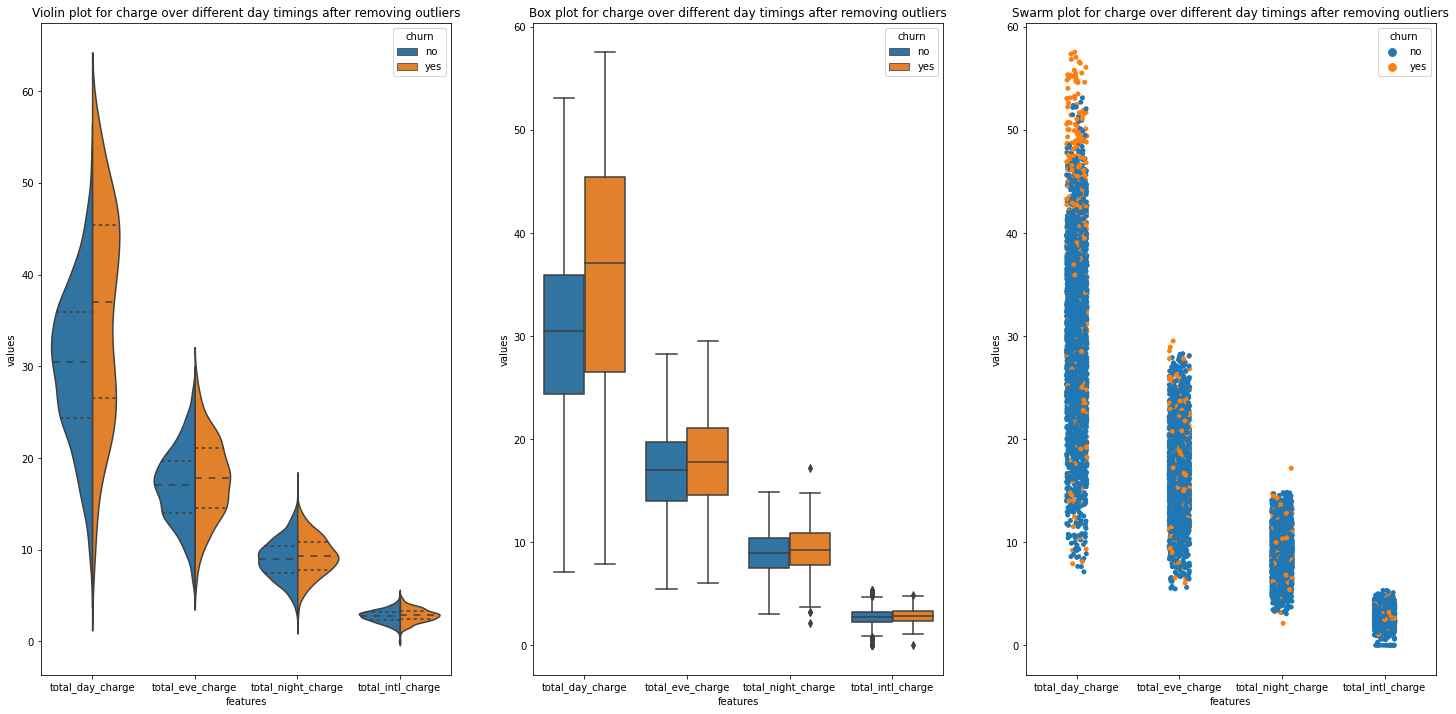

In [80]:
df_melt_without_outliers = featurize_numerical_col(numerical_OutlierRemoved)
multiple_analysis('charge' , df_melt_without_outliers , additional_info = ' after removing outliers' )

## Feature Engineering <a class="anchor" id="feature_engineering"></a>

This step is a supplementary step to remove outliers from charge and minute coloumns. That's because YES group are charged more than NO group.

Disposing of extremes charges from NO group will make the following feature makes more sense.




Here I introduce 3 features:-

Total minutes and charge of the day  *(internatational is excluded)*

The average charge per international call


In [81]:
def feature_1(df):
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] +df['total_intl_minutes']
    return df

def feature_2(df):
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] +df['total_intl_minutes']
    return df

def feature_3(df):
    minutes=  df['total_intl_minutes'].apply(lambda x : x if x >0 else 0.01)
    df['intl_charge_per_minutes'] = df['total_intl_charge']/minutes
    return df



In [82]:
def feature_engineering(df , feature1 =True , feature2 = True  , feature3=True): 
    result = df.copy()
    if feature1 : 
        result = feature_1(result)
    if feature2 : 
        result = feature_2(result)
    if feature3 : 
        result = feature_3(result)
        
    return result 


In [83]:
numerical_OutlierRemoved_featurized = feature_engineering(numerical_OutlierRemoved)
numerical_OutlierRemoved_featurized.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'churn_encoded',
       'total_minutes', 'total_charge', 'intl_charge_per_minutes'],
      dtype='object')

adding all time minutes and all time charges will make a contrast between YES and NO groups

In [84]:
tmp=numerical_OutlierRemoved_featurized[numerical_OutlierRemoved_featurized['churn'] == 'yes']['intl_charge_per_minutes']
tmp2 = numerical_OutlierRemoved_featurized[numerical_OutlierRemoved_featurized['churn'] == 'no']['intl_charge_per_minutes']

## Features Scaling  <a class="anchor" id="feature_scaling"></a>

Feature Scaling is Critical Step when use Algorithms which based on weights and gradient descent.

It helps in assigning the right weights and faster convergence  

In [85]:
### - check distibution

<ipython-input-86-9f5da613d1e1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  numerical_data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>],
       [<AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>],
       [<AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>],
       [<AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>,
        <AxesSubplot:title={'center':'number_customer_service_calls'}>,
        <AxesSubplot:>]], dtype=object)

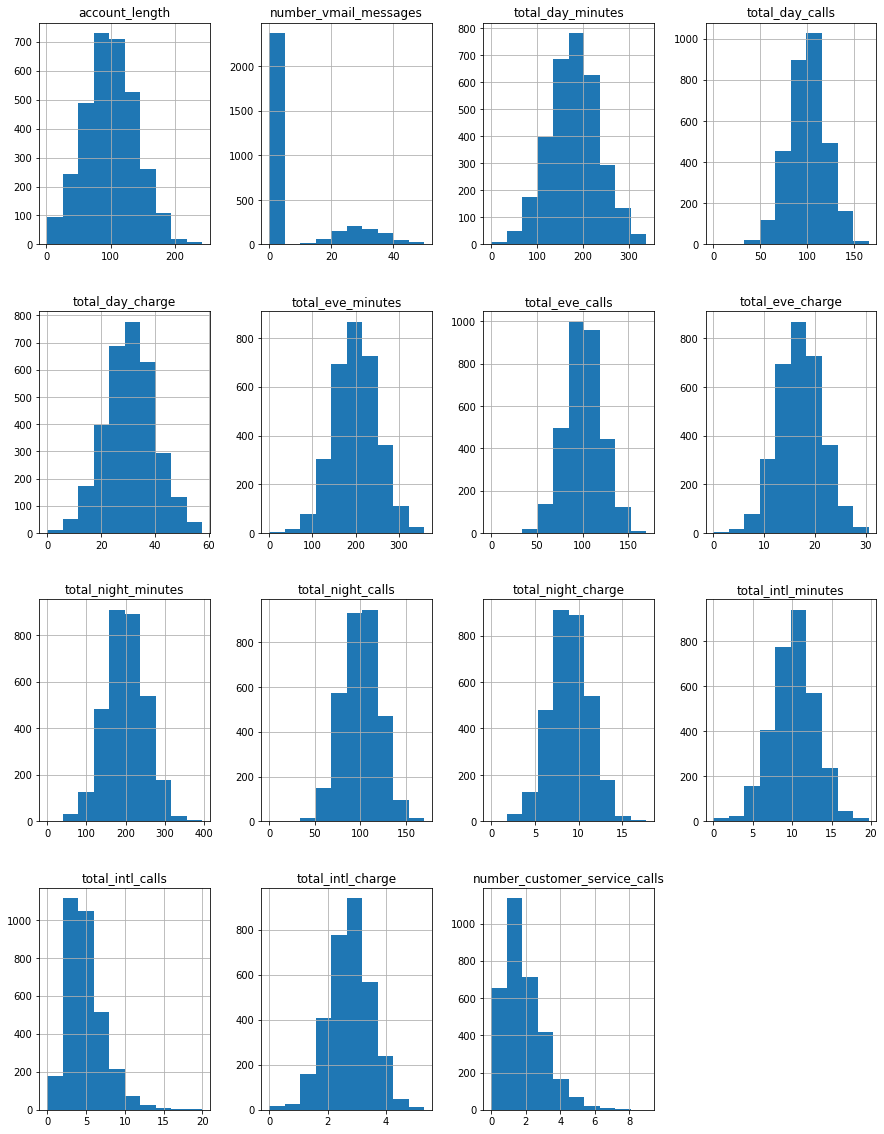

In [86]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
numerical_data.hist(ax = ax)



In [87]:
def standarize_numerical(df, cols):
    result = df.copy() 
    for column in cols:
        if result.dtypes[column] != np.object:
            result[column] = StandardScaler().fit_transform(result[[column]]) 
    return result


In [91]:
def normalize_numerical(df, cols):
    result = df.copy() 
    for column in cols:
        if result.dtypes[column] != np.object:
            result[column] = RobustScaler().fit_transform(result[[column]]) 
    return result

In [92]:
def features_scaling(df):
    result = df.copy()
    numrical_columns= df.columns[ df.dtypes != np.object].values
    not_normal_distributed_cols = ['number_customer_service_calls' , 'number_vmail_messages']
    normal_distributed_cols = np.setdiff1d(numrical_columns,not_normal_distributed_cols) 
    #normal_distributed_cols = np.setdiff1d(normal_distributed_cols,['number_customer_service_calls_binned']) # number_customer_service_calls_binned Already has 0 and ones onyly
    result= normalize_numerical(result, not_normal_distributed_cols)
    result = standarize_numerical(result, normal_distributed_cols)
        
    return result
        
        

In [93]:
numerical_OutlierRemoved_featurized_scaled = features_scaling(numerical_OutlierRemoved_featurized)
numerical_OutlierRemoved_scaled = features_scaling(numerical_OutlierRemoved)


## Features Correlation Analysis <a class="anchor" id="feature_corr"></a>

Text(0.5, 1.0, 'Heat map of Columns Corr. of Featurized df')

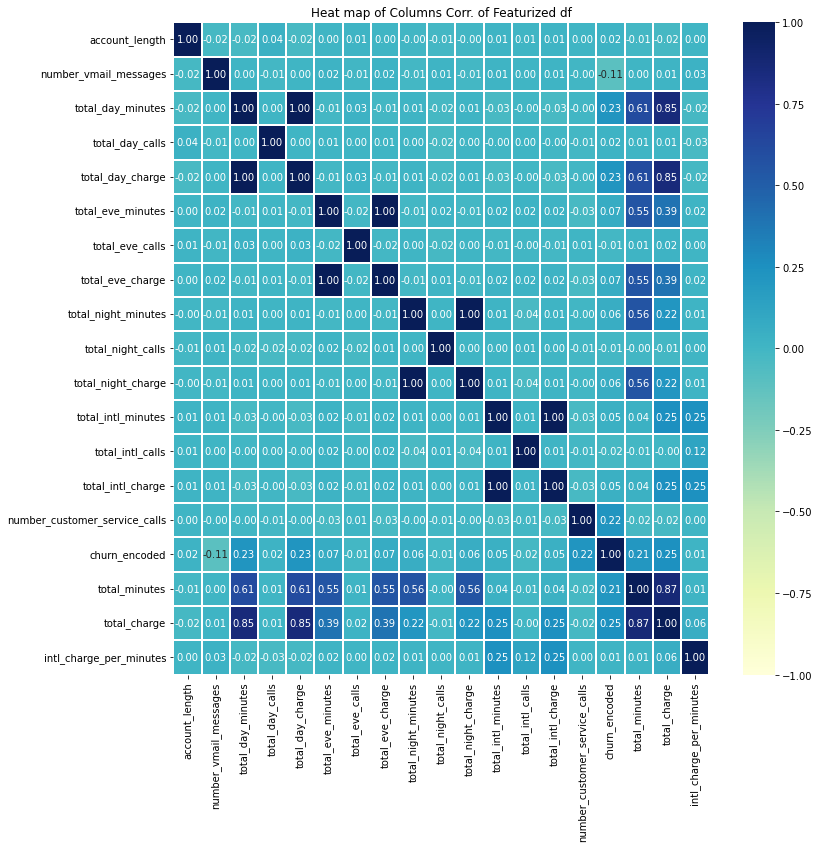

In [94]:
plt.figure(figsize=(12,12))
sns.heatmap(numerical_OutlierRemoved_featurized_scaled.corr(), annot=True,
            cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2 ,fmt= '.2f')
plt.title('Heat map of Columns Corr. of Featurized df')

Text(0.5, 1.0, 'Heat map of Columns Corr. of NOT Featurized df')

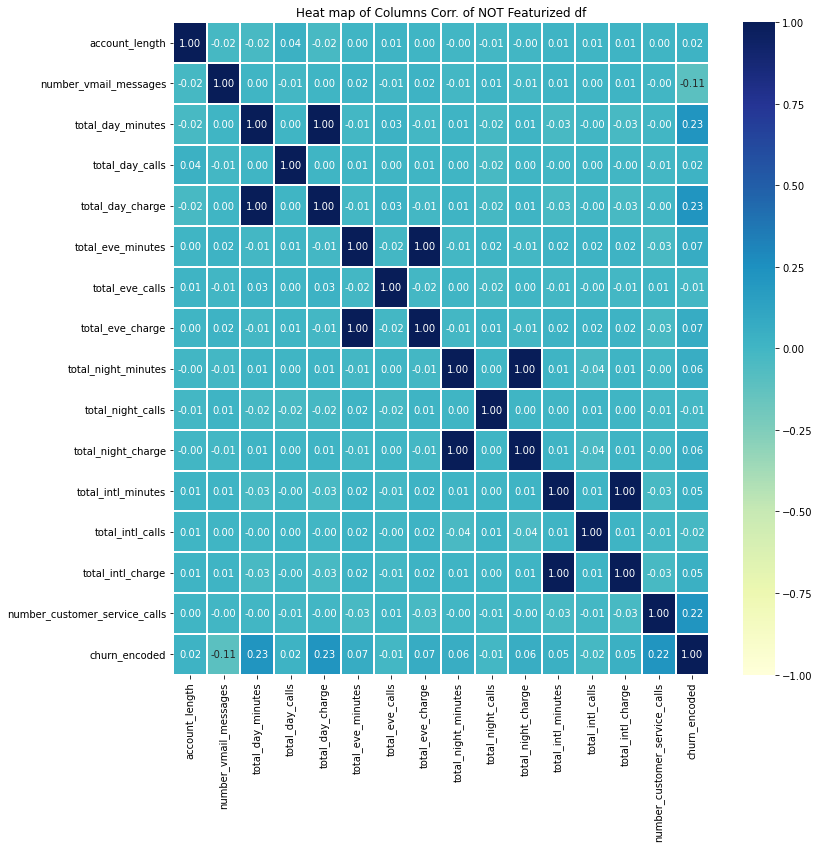

In [95]:
 plt.figure(figsize=(12,12))
sns.heatmap(numerical_OutlierRemoved_scaled.corr(),
            annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2 ,fmt= '.2f')
plt.title('Heat map of Columns Corr. of NOT Featurized df')

Here we can observe many things: 

1- The engineered feature got the highest correlation 

2- minutes columns have strong positive correlation to charge columns, as expected in the first analysis

This correlation would make the model is biased to these dependent features, That is why I will dispose of them 


In [96]:
numerical_OutlierRemoved_featurized_scaled_independent= numerical_OutlierRemoved_featurized_scaled.drop(['total_day_charge' ,
                                                                                                        'total_intl_minutes' ,
                                                                                                         'total_night_charge',
                                                                                                         'total_eve_charge' , 
                                                                                                         'total_day_minutes',
                                                                                                          'churn' ] , axis= 1)

numerical_OutlierRemoved_scaled_independent = numerical_OutlierRemoved_scaled.drop(['total_night_minutes',
                                                                               'total_intl_minutes' ,
                                                                               'total_eve_minutes' ,
                                                                               'total_day_minutes' ,
                                                                               'churn' ] , axis= 1)

Text(0.5, 1.0, 'Heat map of Columns Corr. of Featurized df after removing high dependencies ')

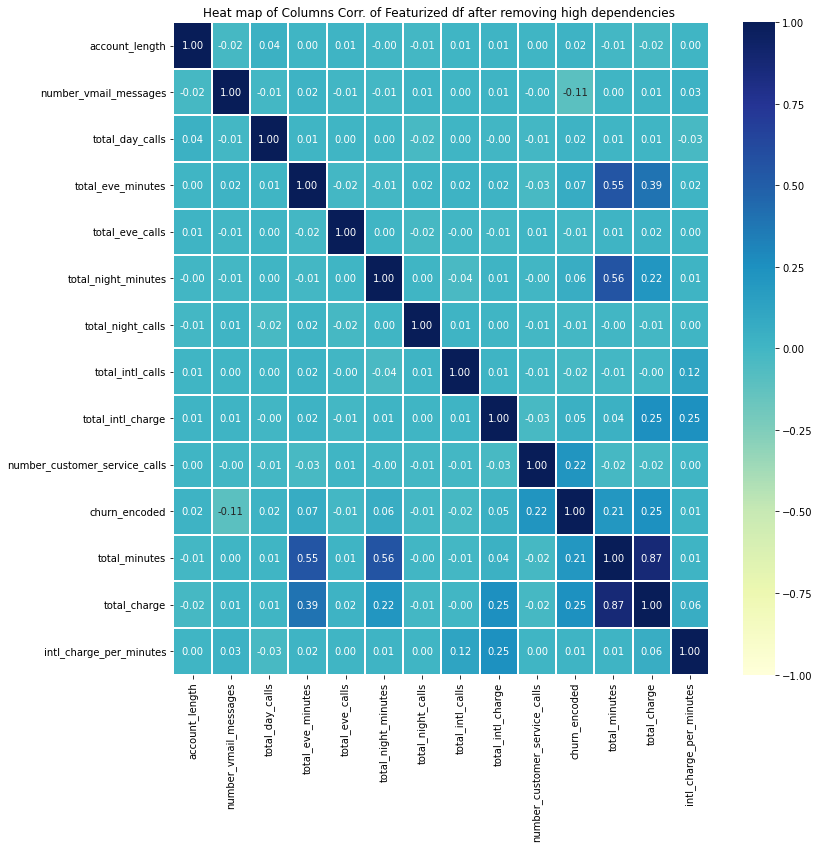

In [97]:
plt.figure(figsize=(12,12))
sns.heatmap(numerical_OutlierRemoved_featurized_scaled_independent.corr(), annot=True,
            cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2 ,fmt= '.2f')
plt.title('Heat map of Columns Corr. of Featurized df after removing high dependencies ')

Text(0.5, 1.0, 'Heat map of Columns Corr. of NOT Featurized df after removing high dependencies')

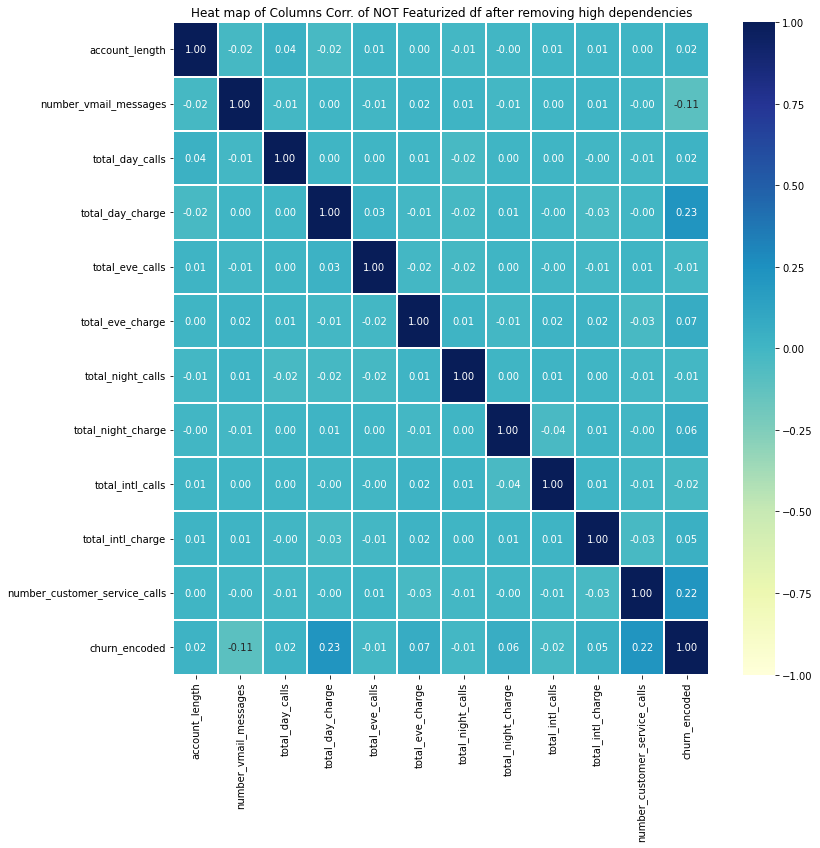

In [98]:
plt.figure(figsize=(12,12))
sns.heatmap(numerical_OutlierRemoved_scaled_independent.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2 ,fmt= '.2f')
plt.title('Heat map of Columns Corr. of NOT Featurized df after removing high dependencies')

In [99]:
numerical_OutlierRemoved_featurized_scaled_independent.drop( 'churn_encoded' , inplace = True , axis = 1 )
numerical_OutlierRemoved_scaled_independent.drop('churn_encoded' , inplace = True , axis = 1 )

In [100]:
print ("Columns of Non- featurized datased" ,numerical_OutlierRemoved_scaled_independent.columns)
print ("# Columns" ,len(numerical_OutlierRemoved_scaled_independent.columns))

Columns of Non- featurized datased Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')
# Columns 11


In [101]:
print ("Columns of featurized datased" ,numerical_OutlierRemoved_featurized_scaled_independent.columns)
print ("# Columns" ,len(numerical_OutlierRemoved_featurized_scaled_independent.columns))

Columns of featurized datased Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'total_minutes', 'total_charge',
       'intl_charge_per_minutes'],
      dtype='object')
# Columns 13


## Categorical Data Analysis and Preprocessing <a class="anchor" id="cat_analysis"></a>

In [102]:
categorical_data_preprocessesd =categorical_data.copy() 
categorical_data_preprocessesd = categorical_data_preprocessesd.drop(indicies_removed , axis = 0)

In [103]:
categorical_data_preprocessesd.head()

,state,area_code,international_plan,voice_mail_plan,churn
1061,NC,area_code_510,no,no,no
3503,OK,area_code_415,no,no,yes
2362,ID,area_code_415,no,no,no
204,AZ,area_code_408,no,no,no
3062,AR,area_code_408,yes,yes,yes


remove string from area_code to make it easier to deal with 

In [104]:
categorical_data_preprocessesd.loc[:,'area_code'] = categorical_data_preprocessesd['area_code'].apply(lambda x: int(x.split("_")[2]))
categorical_data_preprocessesd.head()

,state,area_code,international_plan,voice_mail_plan,churn
1061,NC,510,no,no,no
3503,OK,415,no,no,yes
2362,ID,415,no,no,no
204,AZ,408,no,no,no
3062,AR,408,yes,yes,yes


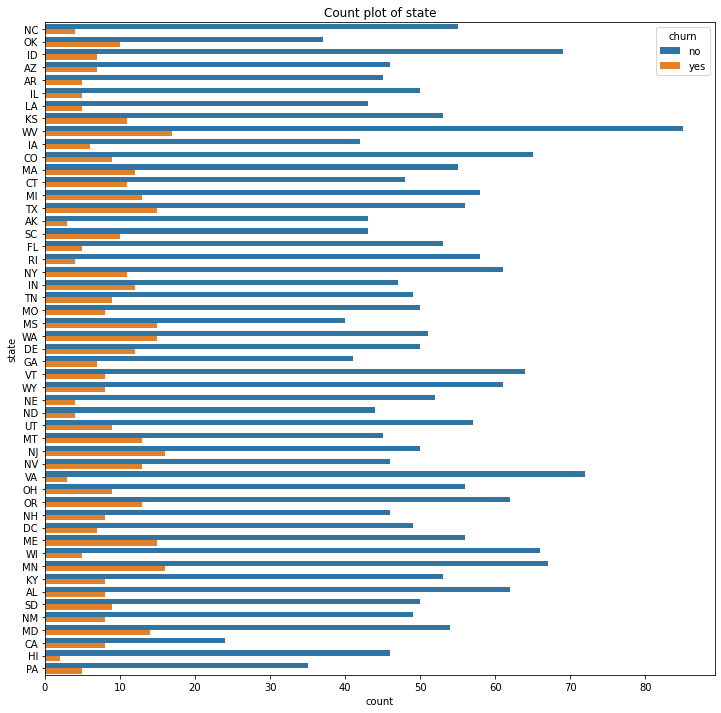

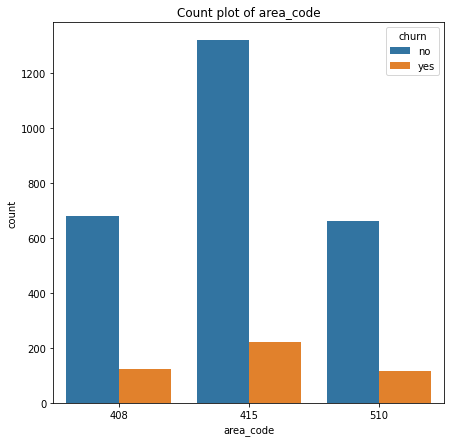

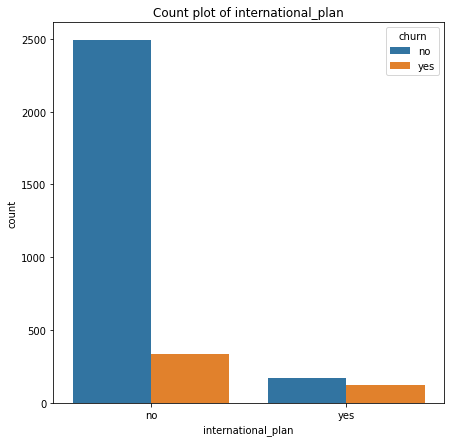

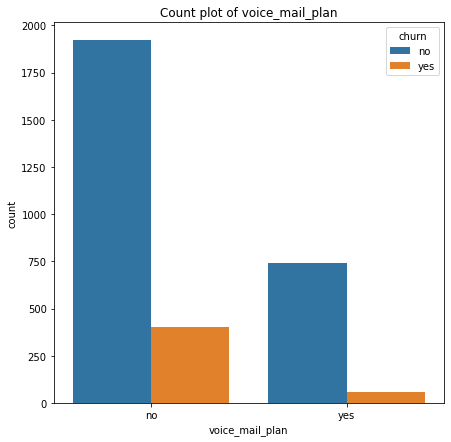

In [105]:
for col in cat_columns :
    if col != 'churn':
        if categorical_data_preprocessesd[col].nunique() >5 :
            plt.figure(figsize=(12,12))
            sns.countplot(data =categorical_data_preprocessesd , y= col ,hue = 'churn' )

        else :
            plt.figure(figsize=(7,7))
            sns.countplot(data =categorical_data_preprocessesd , x= col ,hue = 'churn' )   
        plt.title('Count plot of ' + col )    

## Feature Engineering <a class="anchor" id="cat_feature_engineering"></a>

From The figures above, I can introduce a new feateure . The feature dependes on the subscribtion of the international plan and the voice mail plan that the subscriber of both is more likely not to change the  telecommunications provide 

In [111]:
categorical_preprocessesd_featurized = categorical_data_preprocessesd.copy()

In [112]:
voice_internationa_plan=categorical_data_preprocessesd[(categorical_data_preprocessesd['international_plan'] =='yes') & (categorical_data_preprocessesd['voice_mail_plan'] =='yes') ]

In [113]:
total_subscribers = voice_internationa_plan['churn'].count()

In [114]:
change_user = voice_internationa_plan[voice_internationa_plan['churn'] == 'yes']['churn'].count()

In [115]:
print('The percentage of the subscriber use who change: ' ,change_user*100/ total_subscribers )

The percentage of the subscriber use who change:  29.577464788732396


In [116]:
categorical_preprocessesd_featurized['voice_international_subscriber'] = 'no'

In [117]:
categorical_preprocessesd_featurized['voice_international_subscriber'][voice_internationa_plan.index] ='yes'

<ipython-input-117-3425f59c5fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_preprocessesd_featurized['voice_international_subscriber'][voice_internationa_plan.index] ='yes'


In [118]:
cat_columns_featurized = categorical_preprocessesd_featurized.columns

## Features Independence  <a class="anchor" id="feature_indpendence"></a>

The technique used here is chi square test to check independency between 2 columns 

This techinque assumes in independency. 

I will safely decide dependency @ 95% confidence 

In [119]:
def chi2_test( col1 , col2 ,df):
    contigency= pd.crosstab(df[col1], df[col2] )
    print("contigency table:\n" ,contigency.head())
    
    c, p, dof, expected = chi2_contingency(contigency)

    if p<0.05: 
        print("\nReject null hypothesis H0 \n there's a relationship ")
    else :
        print("\nFail to reject null hypothesis H0 \n there's no  relationship ")
    return p < 0.05 , p


In [120]:
dependency = []
for col in  cat_columns_featurized:
    if col != "churn":
        dependent, p = chi2_test("churn",col , categorical_preprocessesd_featurized)
        if(dependent):
            dependency.append((col ,'churn'))

contigency table:
 state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
churn                                          ...                           
no     43  62  45  46  24  65  48  49  50  53  ...  50  49  56  57  72  64   
yes     3   8   5   7   8   9  11   7  12   5  ...   9   9  15   9   3   8   

state  WA  WI  WV  WY  
churn                  
no     51  66  85  61  
yes    15   5  17   8  

[2 rows x 51 columns]

Reject null hypothesis H0 
 there's a relationship 
contigency table:
 area_code  408   415  510
churn                    
no         680  1318  661
yes        123   221  117

Fail to reject null hypothesis H0 
 there's no  relationship 
contigency table:
 international_plan    no  yes
churn                        
no                  2489  170
yes                  335  126

Reject null hypothesis H0 
 there's a relationship 
contigency table:
 voice_mail_plan    no  yes
churn                     
no               1920  739
yes               

In [121]:
dependency

[('state', 'churn'),
 ('international_plan', 'churn'),
 ('voice_mail_plan', 'churn'),
 ('voice_international_subscriber', 'churn')]

Chi2 show there's a correlation between target class and state, international_plan,  voice_mail_plan and voice_international_subscriber

So no need for area code column

In [122]:
def drop_independent_cat_column(df):
    result = df.copy()
    result.drop('area_code' ,axis = 1 , inplace = True)
    return result
    

In [123]:
categorical_data_preprocessesd = drop_independent_cat_column(categorical_data_preprocessesd)
categorical_data_preprocessesd.columns

Index(['state', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [124]:
categorical_preprocessesd_featurized = drop_independent_cat_column(categorical_preprocessesd_featurized)
categorical_preprocessesd_featurized.columns

Index(['state', 'international_plan', 'voice_mail_plan', 'churn',
       'voice_international_subscriber'],
      dtype='object')

## Categories Encoding  <a class="anchor" id="cat_encoding"></a>

In [125]:
categorical_preprocessesd_featurized.nunique()

state                             51
international_plan                 2
voice_mail_plan                    2
churn                              2
voice_international_subscriber     2
dtype: int64

label encoding is used for international_plan, voice_international_subscriber and voice_mail_plan and not one hot encoding because they have just 2 categories

In [126]:
def labelEncoder(df, col):
    labels = {'yes' : 1 , 'no' :0}
    result = df.copy()
    result[col+'_encoded'] =result[col].map(labels)
    return result
    

Unlike state column that 51 categories which stop from label and one hot encoding , Thus I used binary econding

In [127]:
def BinaryEncoder(df,col,):
    result = df.copy()
    
    BinaryEncoder = CategortEncoder.BinaryEncoder()
    state_encoded = BinaryEncoder.fit_transform(result[col])
    result = pd.concat([result, state_encoded], axis=1)
    encoded_col_named = state_encoded.columns
    
    with open("utils/BinaryEncoder", "wb") as f: 
        pickle.dump(BinaryEncoder, f)
    
    return result , encoded_col_named

In [128]:
def encode(df , featurized =False):
    result =df.copy()
    result = labelEncoder(result , 'churn')
    result = labelEncoder(result , 'international_plan')
    result = labelEncoder(result , 'voice_mail_plan')
    if (featurized):
        result = labelEncoder(result , 'voice_international_subscriber')
    result , encoded_col_names  = BinaryEncoder(result , 'state')
    encoded_col_names = np .append(encoded_col_names, ['churn_encoded' ,
                                                       'international_plan_encoded' ,
                                                       'voice_mail_plan_encoded'], axis=None) 
    return result ,encoded_col_names


In [129]:
categorical_data_preprocessesd_encoded,encoded_col_names  =encode(categorical_data_preprocessesd)

In [130]:
encoded_col_names

array(['state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'churn_encoded', 'international_plan_encoded',
       'voice_mail_plan_encoded'], dtype=object)

In [131]:
categorical_preprocessesd_featurized_econded,encoded_col_names_featurized  =encode(categorical_preprocessesd_featurized ,True)

In [132]:
categorical_preprocessesd_featurized_econded

,state,international_plan,voice_mail_plan,churn,voice_international_subscriber,churn_encoded,international_plan_encoded,voice_mail_plan_encoded,voice_international_subscriber_encoded,state_0,state_1,state_2,state_3,state_4,state_5
1061,NC,no,no,no,no,0,0,0,0,0,0,0,0,0,1
3503,OK,no,no,yes,no,1,0,0,0,0,0,0,0,1,0
2362,ID,no,no,no,no,0,0,0,0,0,0,0,0,1,1
204,AZ,no,no,no,no,0,0,0,0,0,0,0,1,0,0
3062,AR,yes,yes,yes,yes,1,1,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,MD,no,no,no,no,0,0,0,0,1,1,0,0,0,0
3787,WV,yes,yes,no,yes,0,1,1,1,0,0,1,0,0,1
658,AL,no,no,no,no,0,0,0,0,1,0,1,1,0,1
2451,AR,yes,no,no,no,0,1,0,0,0,0,0,1,0,1


the states are represented using 5 columns of 0s and 1s

Check Target Class imbalance


<AxesSubplot:ylabel='churn'>

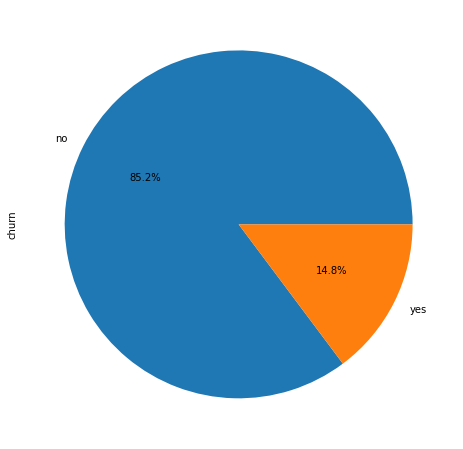

In [133]:
categorical_preprocessesd_featurized['churn'].value_counts().plot(kind='pie' ,figsize=(8, 8) ,autopct='%1.1f%%' )


In [134]:
print('Imbalance Ratio: ', 86/14)

Imbalance Ratio:  6.142857142857143


The target label is pretty imbalanced .. 

Undersampling can't be used due to the small size of the data 

## Oversampling  <a class="anchor" id="oversampling"></a>

the technique used is based on KNN which generates points to the minor class depending on the 5 NNs

In [135]:
Total_train_dataset_fearurized = pd.concat([numerical_OutlierRemoved_featurized_scaled_independent,
                                            categorical_preprocessesd_featurized_econded[encoded_col_names]] , axis=1)


In [136]:
def KNN_oversample(df):
    oversample = SMOTE()
    X = df.drop('churn_encoded' ,axis = 1)
    y = df['churn_encoded']
    X_sampled, y_sampled =  oversample.fit_resample(X, y)
    print("Tatget classes counts after oversampling:\n", y_sampled.value_counts())
    return X_sampled , y_sampled
    
    
    

In [137]:
x,y=KNN_oversample(Total_train_dataset_fearurized)

Tatget classes counts after oversampling:
 0    2659
1    2659
Name: churn_encoded, dtype: int64


<AxesSubplot:ylabel='churn_encoded'>

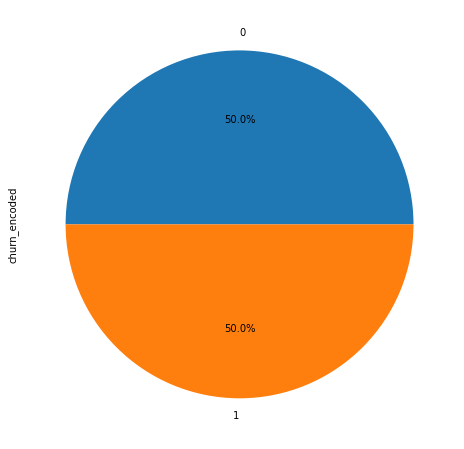

In [142]:
pd.concat([x,y] , axis=1)['churn_encoded'].value_counts().plot(kind='pie' ,figsize=(8, 8) ,autopct='%1.1f%%' )

**Note that the functions used here are written in usils.preprocessing to make training pipeline easier**